# Taller 2
Presentado por
### Victor Manuel Dávila
### Oscar Javier Restrepo
### Daniel Lozano Barrero

## Redimensionamiento

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interior=cv2.imread('taller2img/interior.jpg')

#Leemos el tamaño de la imagen
h,w=interior.shape[:2]
#Se redimensiona
down_width = int(w*0.25)
down_height = int(h*0.25)
down_points = (down_width, down_height)
resized_down = cv2.resize(interior, down_points, interpolation= cv2.INTER_LINEAR)
#Se vuelve a redimensionar
up_width = int(w*0.5)
up_height = int(h*0.5)
up_points = (up_width, up_height)
resized_up = cv2.resize(interior, up_points, interpolation= cv2.INTER_LINEAR)
cv2.imshow('Redimensionamiento ', resized_down)
cv2.waitKey()
cv2.imshow('Redimensionamiento', resized_up)
cv2.waitKey()
cv2.destroyAllWindows()

No se evidencian diferencias en los métodos empleados de redimensionamiento. Seguramente el gran tamaño de la imagen original hace que los redimensionamientos no se pixelen ni se evidencie pérdida de información de la misma

In [3]:
#Redimensionamiento con varios métodos de interpolación
down_width = int(w*0.25)
down_height = int(h*0.25)
down_points = (down_width, down_height)

resized_linear = cv2.resize(interior, down_points, interpolation= cv2.INTER_LINEAR)
resized_area = cv2.resize(interior, down_points, interpolation= cv2.INTER_AREA)
resized_cubic = cv2.resize(interior, down_points, interpolation= cv2.INTER_CUBIC)
resized_nearest = cv2.resize(interior, down_points, interpolation= cv2.INTER_NEAREST)

cv2.imshow('Redimensionamiento lineal', resized_linear)
cv2.waitKey()
cv2.imshow('Redimensionamiento area', resized_area)
cv2.waitKey()
cv2.imshow('Redimensionamiento cúbico', resized_cubic)
cv2.waitKey()
cv2.imshow('Redimensionamiento nearest', resized_nearest)
cv2.waitKey()
cv2.destroyAllWindows()



No se evidencian diferencias en los resultados obtendios para los diferentes métodos de interpolación empleados en el redimensionamiento de la imagen.

## Conversión de Color

(<Axes: >, <matplotlib.image.AxesImage at 0x19ff873b410>)

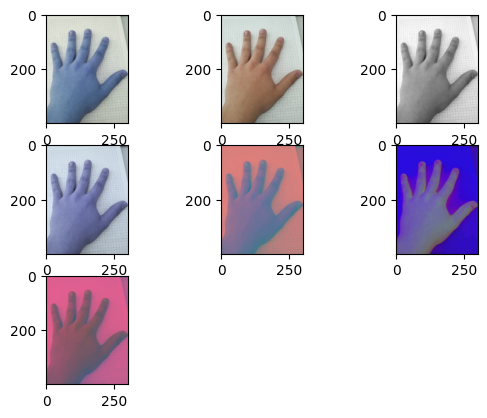

In [4]:
interiorRGB= cv2.cvtColor(resized_linear, cv2.COLOR_BGR2RGB)
interiorGRAY= cv2.cvtColor(interiorRGB, cv2.COLOR_RGB2GRAY)
interiorXYZ= cv2.cvtColor(resized_linear, cv2.COLOR_RGB2XYZ)
interiorYCrCb= cv2.cvtColor(resized_linear, cv2.COLOR_RGB2YCrCb)
interiorHSV= cv2.cvtColor(resized_linear, cv2.COLOR_RGB2HSV)
interiorLuv= cv2.cvtColor(resized_linear, cv2.COLOR_RGB2LUV)

plt.subplot(331), plt.imshow(resized_linear)
plt.subplot(332), plt.imshow(interiorRGB)
plt.subplot(333), plt.imshow(interiorGRAY, cmap="gray")
plt.subplot(334), plt.imshow(interiorXYZ)
plt.subplot(335), plt.imshow(interiorYCrCb)
plt.subplot(336), plt.imshow(interiorHSV)
plt.subplot(337), plt.imshow(interiorLuv)


Se aprecia cómo la interpretación de color va cambiando en cada espacio de color. En todos los espacios de color las formas principales se mantienen, pero los detalles (como de la cuadrícula de la hoja) se pueden perder dependiendo el espacio de color.

## Umbralización

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0xc36e350>)

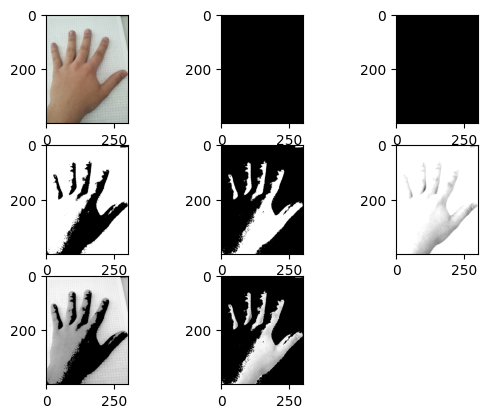

In [30]:
th_0_255, dst_0_255= cv2.threshold(interiorGRAY, 0, 255, cv2.THRESH_BINARY); 
th_0_128, dst_0_128 = cv2.threshold(interiorGRAY, 0, 128, cv2.THRESH_BINARY); 
th_127_255, dst_127_255 = cv2.threshold(interiorGRAY,127,255, cv2.THRESH_BINARY); 
th_Binary_inv, dst_Binary_inv = cv2.threshold(interiorGRAY,127,255, cv2.THRESH_BINARY_INV); 
th_trunc, dst_trunc = cv2.threshold(interiorGRAY,127,255, cv2.THRESH_TRUNC); 
th_tozero, dst_tozero = cv2.threshold(interiorGRAY,127,255, cv2.THRESH_TOZERO); 
th_tozero_inv, dst_tozero_inv = cv2.threshold(interiorGRAY,127,255, cv2.THRESH_TOZERO_INV); 
#print(dst_127_255)

plt.subplot(331), plt.imshow(interiorRGB)
plt.subplot(332), plt.imshow(dst_0_255, cmap="gray")
plt.subplot(333), plt.imshow(dst_0_128, cmap="gray")
plt.subplot(334), plt.imshow(dst_127_255, cmap="gray")
plt.subplot(335), plt.imshow(dst_Binary_inv, cmap="gray")
plt.subplot(336), plt.imshow(dst_trunc, cmap="gray")
plt.subplot(337), plt.imshow(dst_tozero, cmap="gray")
plt.subplot(338), plt.imshow(dst_tozero_inv, cmap="gray")


La umbralización que mejor lleva a que se distinga la mano del fondo (hoja de papel) es que utiliza una umbralización TOZERO. La umbralización binaria sólo dejó un único objeto (todo en negro)

# Umbralización Adaptativa

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0xd570bb0>)

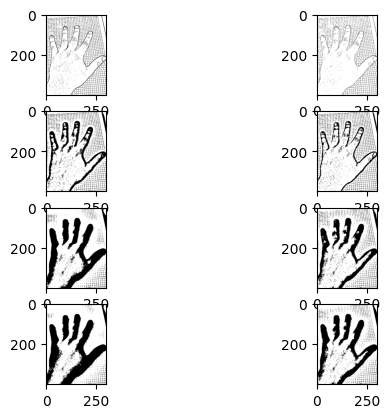

In [31]:
interior_array=interiorGRAY.astype(np.uint8)
adaptive_mean_binary_5 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 5) 
adaptive_gaussian_binary_5 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 5)
adaptive_mean_binary_25 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, 5) 
adaptive_gaussian_binary_25 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 5)
adaptive_mean_binary_75 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 75, 5) 
adaptive_gaussian_binary_75 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 75, 5)
adaptive_mean_binary_105 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 105, 5) 
adaptive_gaussian_binary_105 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 105, 5)
adaptive_mean_binary_199 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5) 
adaptive_gaussian_binary_199 = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)
adaptive_mean_binary_inv = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 5) 
adaptive_gaussian_binary_inv = cv2.adaptiveThreshold(interior_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 5) 

plt.subplot(421), plt.imshow(adaptive_mean_binary_5, cmap="gray")
plt.subplot(422), plt.imshow(adaptive_gaussian_binary_5, cmap="gray")
plt.subplot(423), plt.imshow(adaptive_mean_binary_25, cmap="gray")
plt.subplot(424), plt.imshow(adaptive_gaussian_binary_25, cmap="gray")
plt.subplot(425), plt.imshow(adaptive_mean_binary_75, cmap="gray")
plt.subplot(426), plt.imshow(adaptive_gaussian_binary_75, cmap="gray")
plt.subplot(427), plt.imshow(adaptive_mean_binary_105, cmap="gray")
plt.subplot(428), plt.imshow(adaptive_gaussian_binary_105, cmap="gray")


La umbralización adaptativa genera mejores resultados que la umbralización normal. Tanto el THRESH_MEAN_C y el THRESH_GAUSSIAN_C evidencían la separación de la mano del fondo (hoja de papel)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0xd8b47d0>)

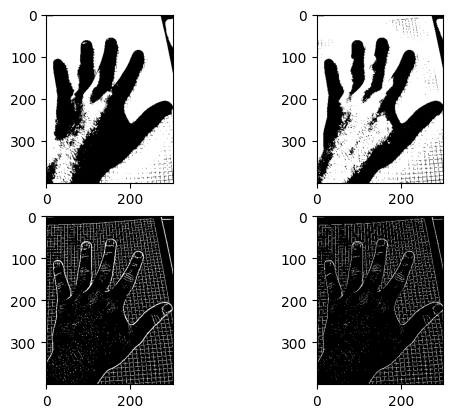

In [32]:
plt.subplot(221), plt.imshow(adaptive_mean_binary_199, cmap="gray")
plt.subplot(222), plt.imshow(adaptive_gaussian_binary_199, cmap="gray")
plt.subplot(223), plt.imshow(adaptive_mean_binary_inv, cmap="gray")
plt.subplot(224), plt.imshow(adaptive_gaussian_binary_inv, cmap="gray")

El método ADAPTIVE_GAUSSIAN_BINARY_INV generan claras deiferenciaciones de bordes. Se pueden ver, aparte de la mano, las líneas de cuadrículas.

## Filtros Lineales

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0xd93e9f0>)

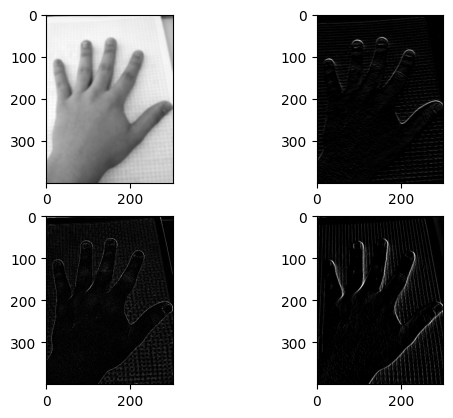

In [33]:
mascara1=np.ones((5,5))/25
mascara2=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
mascara3=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
mascara4=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
linear_m1=cv2.filter2D(interiorGRAY,ddepth=-1, kernel=mascara1)
linear_m2=cv2.filter2D(interiorGRAY,ddepth=-1, kernel=mascara2)
linear_m3=cv2.filter2D(interiorGRAY,ddepth=-1, kernel=mascara3)
linear_m4=cv2.filter2D(interiorGRAY,ddepth=-1, kernel=mascara4)


plt.subplot(221), plt.imshow(linear_m1, cmap="gray")
plt.subplot(222), plt.imshow(linear_m2, cmap="gray")
plt.subplot(223), plt.imshow(linear_m3, cmap="gray")
plt.subplot(224), plt.imshow(linear_m4, cmap="gray")



Se puede apreciar cómo al cambiar la máscara que se aplica para el filtrado, el resultado de la imagen es diferente. Por ejemplo, el filtro con máscara [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] permite evidenciar los contornos, en este caso el de la mano y las líneas de las cuadrículas

## Filtros de suavizado

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0xda2cff0>)

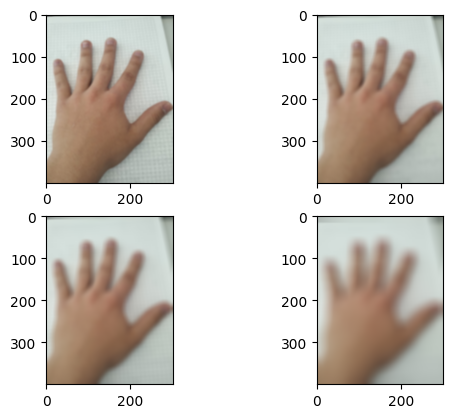

In [34]:
blur_5x5 =cv2.blur(interiorRGB,(5,5))
blur_10x10 =cv2.blur(interiorRGB,(10,10))
blur_15x15 =cv2.blur(interiorRGB,(15,15))
blur_30x30 =cv2.blur(interiorRGB,(30,30))

plt.subplot(221), plt.imshow(blur_5x5)
plt.subplot(222), plt.imshow(blur_10x10)
plt.subplot(223), plt.imshow(blur_15x15)
plt.subplot(224), plt.imshow(blur_30x30)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16ddb7b0>)

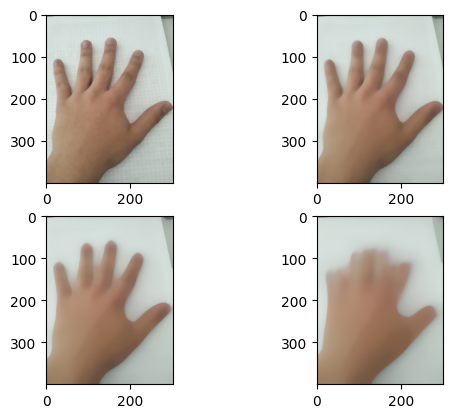

In [35]:
meanblur_5 =cv2.medianBlur(interiorRGB,5)
meanblur_15 =cv2.medianBlur(interiorRGB,15)
meanblur_31 =cv2.medianBlur(interiorRGB,31)
meanblur_61 =cv2.medianBlur(interiorRGB,61)

plt.subplot(221), plt.imshow(meanblur_5)
plt.subplot(222), plt.imshow(meanblur_15)
plt.subplot(223), plt.imshow(meanblur_31)
plt.subplot(224), plt.imshow(meanblur_61)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16ea8d30>)

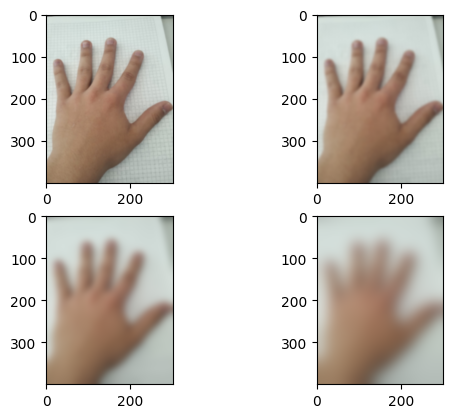

In [36]:
gaussianblur_5 =cv2.GaussianBlur(interiorRGB,(5,5),0)
gaussianblur_15 =cv2.GaussianBlur(interiorRGB,(15,15),0)
gaussianblur_51 =cv2.GaussianBlur(interiorRGB,(51,51),0)
gaussianblur_101 =cv2.GaussianBlur(interiorRGB,(101,101),0)

plt.subplot(221), plt.imshow(gaussianblur_5)
plt.subplot(222), plt.imshow(gaussianblur_15)
plt.subplot(223), plt.imshow(gaussianblur_51)
plt.subplot(224), plt.imshow(gaussianblur_101)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x17115110>)

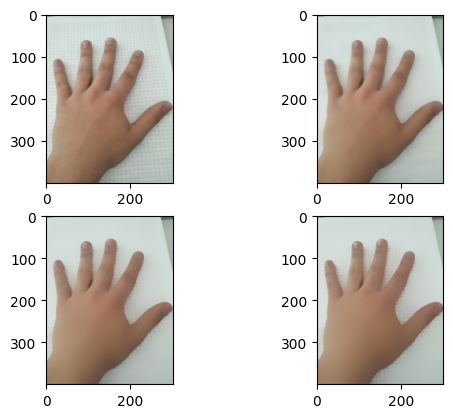

In [37]:
bilateralFilter_5 =cv2.bilateralFilter(interiorRGB,5,75,75)
bilateralFilter_15 =cv2.bilateralFilter(interiorRGB,15,75,75)
bilateralFilter_35 =cv2.bilateralFilter(interiorRGB,35,75,75)
bilateralFilter_55 =cv2.bilateralFilter(interiorRGB,55,75,75)

plt.subplot(221), plt.imshow(bilateralFilter_5)
plt.subplot(222), plt.imshow(bilateralFilter_15)
plt.subplot(223), plt.imshow(bilateralFilter_35)
plt.subplot(224), plt.imshow(bilateralFilter_55)

En los diferentes filtros de suavizado se puede ver cómo algunos de ellos pueden generar pérdida significativa de la imagen principal. Por ejemplo el filtro MEDIANBLUR puede llegar a que la mano aparezca como sise tuviesen amputados algunos dedos. Los GAUSSIANBLUR generan un efecto de perdida de nitidez de la imagen. Por su parte, el BILATERALFILTER generan las sensación de mejorar la nitidez de la imagen y eliminando algunos detalles al interior del objeto principál (mano)

## Contorno de Imagen

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x127af7b0>)

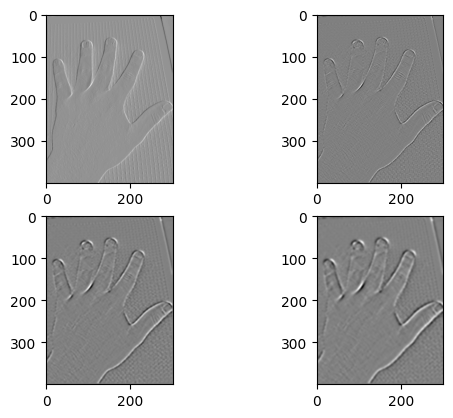

In [38]:
sobel_1 = cv2.Sobel(interiorGRAY,cv2.CV_64F,1,0,ksize=3) 
sobel_2 = cv2.Sobel(interiorGRAY,cv2.CV_64F,1,1,ksize=5) 
sobel_3 = cv2.Sobel(interiorGRAY,cv2.CV_64F,1,1,ksize=15) 
sobel_4 = cv2.Sobel(interiorGRAY,cv2.CV_64F,1,1,ksize=25) 

plt.subplot(221), plt.imshow(sobel_1, cmap="gray")
plt.subplot(222), plt.imshow(sobel_2, cmap="gray")
plt.subplot(223), plt.imshow(sobel_3, cmap="gray")
plt.subplot(224), plt.imshow(sobel_4, cmap="gray")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x15d598b0>)

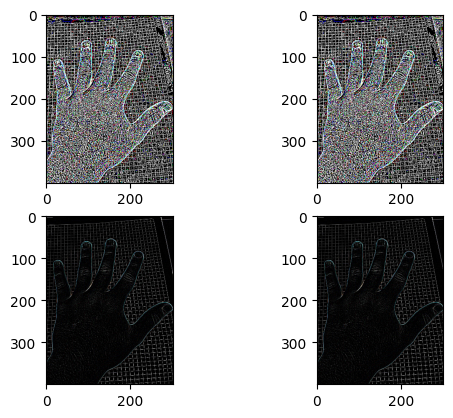

In [39]:
laplacian_1 = cv2.Laplacian(interiorRGB,cv2.CV_64F,None,3) 
laplacian_2 = cv2.Laplacian(interiorRGB,cv2.CV_32F,None,3) 
laplacian_3 = cv2.Laplacian(interiorRGB,cv2.CV_8U,None,3) 
laplacian_4 = cv2.Laplacian(interiorRGB,cv2.CV_16S,None,3) 

plt.subplot(221), plt.imshow(laplacian_1,cmap="gray")
plt.subplot(222), plt.imshow(laplacian_2)
plt.subplot(223), plt.imshow(laplacian_3)
plt.subplot(224), plt.imshow(laplacian_4)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1625cf10>)

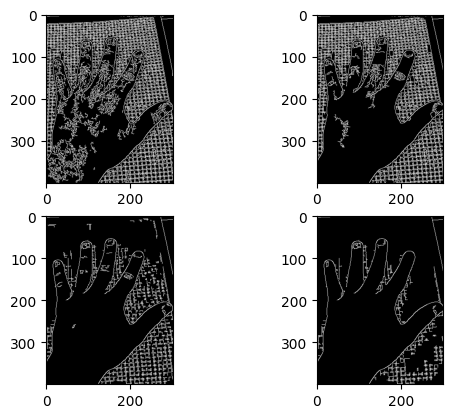

In [40]:
canny_1 = cv2.Canny(interiorGRAY,10,50) 
canny_2 = cv2.Canny(interiorGRAY,10,100) 
canny_3 = cv2.Canny(interiorGRAY,50,100) 
canny_4 = cv2.Canny(interiorGRAY,50,150) 

plt.subplot(221), plt.imshow(canny_1, cmap="gray")
plt.subplot(222), plt.imshow(canny_2, cmap="gray")
plt.subplot(223), plt.imshow(canny_3, cmap="gray")
plt.subplot(224), plt.imshow(canny_4, cmap="gray")

Los filtros de contorno SOBEL generaron unas líneas de separaban el objeto del fondo. Sin embargo, el filtro LAPLACIAN, en especial con el tipo de dato cv2.CV_8U, mejoraron los resultados de la separación de contorno, aunque también diferencia las cuadrículas. El filtro CANNY mejoró esa separación, aislado mucho mejor la mano del fondo.

## Filtro de Prewitt de ocho direcciones

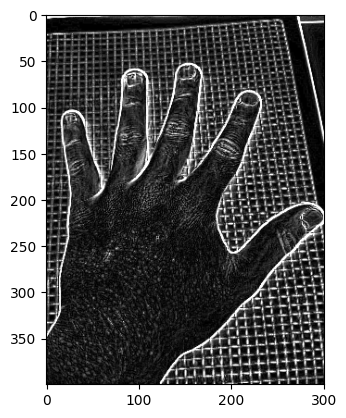

In [43]:
kerN=np.asarray([[-1,-1,-1],
                [1,-2,1],
                [1,1,1]])

kerS=np.asarray([[1,1,1],
                [1,-2,1],
                [-1,-1,-1]])
kerO=np.asarray([[-1,1,1],
                [-1,-2,1],
                [-1,1,1]])
kerE=np.asarray([[1,1,-1],
                [1,-2,-1],
                [1,1,-1]])
kerNO=np.asarray([[-1,-1,1],
                [-1,-2,1],
                [1,1,1]])

kerSO=np.asarray([[1,1,1],
                [-1,-2,1],
                [-1,-1,1]])
kerNE=np.asarray([[1,-1,-1],
                [1,-2,-1],
                [1,1,1]])

kerSE=np.asarray([[1,1,1],
                [1,-2,-1],
                [1,-1,-1]])

filtroN=cv2.filter2D(np.asarray(interiorGRAY),0,kerN)
filtroS=cv2.filter2D(np.asarray(interiorGRAY),0,kerS)
filtroE=cv2.filter2D(np.asarray(interiorGRAY),0,kerE)
filtroO=cv2.filter2D(np.asarray(interiorGRAY),0,kerO)
filtroNO=cv2.filter2D(np.asarray(interiorGRAY),0,kerNO)
filtroSO=cv2.filter2D(np.asarray(interiorGRAY),0,kerSO)
filtroNE=cv2.filter2D(np.asarray(interiorGRAY),0,kerNE)
filtroSE=cv2.filter2D(np.asarray(interiorGRAY),0,kerSE)
suma=cv2.add(filtroN,filtroS)
suma=cv2.add(suma,filtroE)
suma=cv2.add(suma,filtroO)
suma=cv2.add(suma,filtroNO)
suma=cv2.add(suma,filtroSO)
suma=cv2.add(suma,filtroNE)
suma=cv2.add(suma,filtroSE)
#print(filtroN)
#print(filtroNO)
#print(suma)
plt.imshow(suma,cmap="gray")

El filtro PREWITT resultó ser el mejor filtro para separar el contono. Se aprecia una línea nítida y relativamente gruesa para separar la mano del fondo. También resalta las líneas naturales de la piel en las articulaciones de los dedos. Por último, resalta notoriamente la cuadrícula, dándole mayor protagonismo del que tiene en la imágen original.